In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("UPI_Fraud.csv")
data.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20-04-2023,04:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08-08-2023,08:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25-06-2023,07:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28-01-2024,05:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21-06-2023,09:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [3]:
len(data['Device_ID'].unique())

647

In [4]:
data.shape

(7000, 20)

In [5]:
data["Transaction_Type"].unique()

array(['Refund', 'Bank Transfer', 'Subscription', 'Investment',
       'Purchase', 'Other', 'Bill Payment'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                7000 non-null   object 
 1   Date                          7000 non-null   object 
 2   Time                          7000 non-null   object 
 3   Merchant_ID                   7000 non-null   object 
 4   Customer_ID                   7000 non-null   object 
 5   Device_ID                     7000 non-null   object 
 6   Transaction_Type              7000 non-null   object 
 7   Payment_Gateway               7000 non-null   object 
 8   Transaction_City              7000 non-null   object 
 9   Transaction_State             7000 non-null   object 
 10  IP_Address                    7000 non-null   object 
 11  Transaction_Status            7000 non-null   object 
 12  Device_OS                     7000 non-null   object 
 13  Tra

In [7]:
filter_data = data.iloc[:, 6:10]
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Transaction_Type   7000 non-null   object
 1   Payment_Gateway    7000 non-null   object
 2   Transaction_City   7000 non-null   object
 3   Transaction_State  7000 non-null   object
dtypes: object(4)
memory usage: 218.9+ KB


In [8]:
for col in filter_data.columns:
    print(f"-------------{col}-----------------")
    print(filter_data[col].unique())
    print("-----------------------------------")

-------------Transaction_Type-----------------
['Refund' 'Bank Transfer' 'Subscription' 'Investment' 'Purchase' 'Other'
 'Bill Payment']
-----------------------------------
-------------Payment_Gateway-----------------
['SamplePay' 'Other' 'UPI Pay' 'Dummy Bank' 'Alpha Bank' 'Sigma Bank'
 'Bank of Data' 'CReditPAY' 'Gamma Bank']
-----------------------------------
-------------Transaction_City-----------------
['Durgapur' 'Rajpur Sonarpur' 'New Delhi' 'Bharatpur' 'Sagar' 'Bhiwani'
 'Bidhannagar' 'Asansol' 'Kakinada' 'Anantapur' 'Bhopal' 'Loni' 'Panipat'
 'Sonipat' 'Patiala' 'Siwan' 'Malda' 'Baranagar' 'Visakhapatnam'
 'Faridabad' 'Anand' 'Raebareli' 'Hosur' 'Kolkata' 'Sasaram' 'Chennai'
 'Burhanpur' 'Bidar' 'Jodhpur' 'Pune' 'Miryalaguda' 'Mathura' 'Sambalpur'
 'Thane' 'Secunderabad' 'Navi Mumbai' 'Noida' 'Ramagundam'
 'Raurkela Industrial Township' 'Gorakhpur' 'Dhanbad' 'Ajmer' 'Latur'
 'Nanded' 'Meerut' 'Satna' 'Vijayawada' 'Nagaon' 'Ulhasnagar' 'Jehanabad'
 'Surat' 'Kirari Suleman Na

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6995    1
6996    0
6997    1
6998    1
6999    0
Name: fraud, Length: 7000, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == object:
        X[col] = le.fit_transform(X[col])

In [12]:
from sklearn.feature_selection import mutual_info_classif
ig = mutual_info_classif(X, y)
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)

Feature: amount Score: 0.5529559586714696
Feature: Customer_ID Score: 0.5524746130329811
Feature: Merchant_ID Score: 0.5516708464697098
Feature: Transaction_ID Score: 0.5507947560933752
Feature: IP_Address Score: 0.5506696230063177
Feature: Device_ID Score: 0.5505092927035651
Feature: Transaction_Amount_Deviation Score: 0.5452671345832473
Feature: Time Score: 0.5415991904397013
Feature: Date Score: 0.2734355792659904
Feature: Transaction_City Score: 0.24500909710507046
Feature: Days_Since_Last_Transaction Score: 0.03055691693963558
Feature: Transaction_Frequency Score: 0.017897014578526216
Feature: Transaction_State Score: 0.017170495036481492
Feature: Transaction_Channel Score: 0.009279228190198552
Feature: Device_OS Score: 0.008651909197367136
Feature: Transaction_Status Score: 0.007719890324435097
Feature: Transaction_Type Score: 0.0026709105973130587
Feature: Payment_Gateway Score: 0.0001768407143882822
Feature: Merchant_Category Score: 0.0


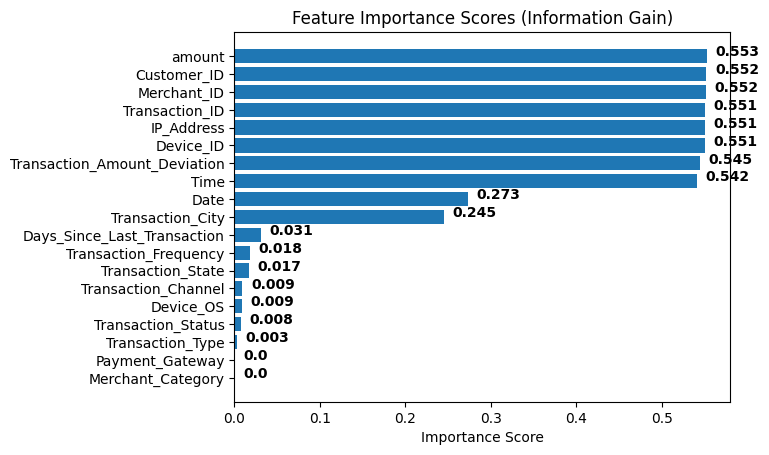

In [13]:
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features: ('Merchant_ID', 'Device_ID', 'Transaction_City', 'Transaction_Status', 'Transaction_Channel', 'amount')
Accuracy: 0.9406122448979591


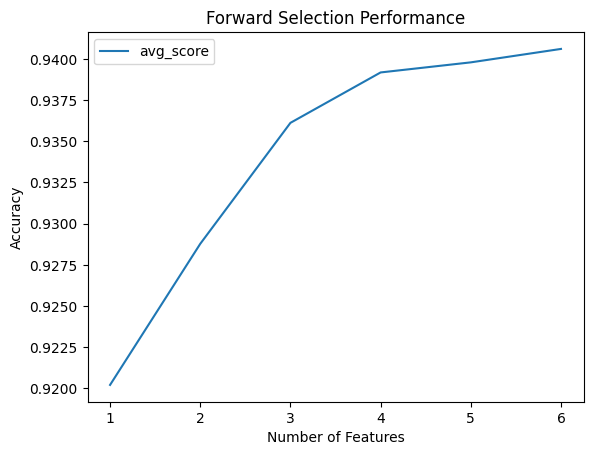

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Define the logistic regression model
model = LogisticRegression()
# Define the forward selection object with only 6 features.
sfs = SFS(model, k_features=6, forward=True, floating=False, scoring="accuracy", cv=5)
# Perform forward selection on the training set
sfs.fit(X_train, y_train)
# Print the selected features
print("Selected Features:", sfs.k_feature_names_)
# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)
# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
X_filtered = X[list(sfs.k_feature_names_)]
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3)
model = LogisticRegression() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(pred, y_test)*100}%")

Model Accuracy: 92.66666666666666%


In [16]:
X_test

,Merchant_ID,Device_ID,Transaction_City,Transaction_Status,Transaction_Channel,amount
2514,181,643,276,1,1,10.30
2557,63,373,232,0,2,644.15
3722,377,455,42,2,1,26.91
4845,558,270,235,2,2,56.53
2056,50,343,236,0,2,84.02
...,...,...,...,...,...,...
4873,29,404,119,0,0,28.51
5637,2,150,88,0,2,50.83
5898,357,48,182,0,2,51.57
5830,384,18,183,2,0,14.65


In [17]:
import joblib
# Save the trained logistic regression model to a file
joblib.dump(model, "logistic_regression_model.pkl")
# Load the model from the file
model = joblib.load("logistic_regression_model.pkl")

In [31]:
X_train

,Merchant_ID,Device_ID,Transaction_City,Transaction_Status,Transaction_Channel,amount
804,643,417,210,1,1,33.53
6044,194,522,193,2,1,413.44
5394,523,593,270,2,1,2144.86
6005,54,321,164,1,2,830.57
697,261,123,246,1,2,58.13
...,...,...,...,...,...,...
3818,412,103,38,2,1,11.81
4792,33,578,5,1,0,138.35
1494,494,265,174,1,2,6.02
2652,272,596,153,0,1,22.43
